<a href="https://colab.research.google.com/github/napronald/Data-Science-Challenge-2023/blob/main/DSC_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, r2_score
import matplotlib.pyplot as plt

In [ ]:
df_ptbd_normal = pd.read_csv("ptbdb_normal.csv", header = None)
df_ptbd_abnormal = pd.read_csv("ptbdb_abnormal.csv", header = None)

# print shapes of the dataframes
print("The shape of the normal dataframe is : ", df_ptbd_normal.shape)
# print one example of the last column
print("Class : ", df_ptbd_normal.iloc[:, -1][0])
print("The shape of the abnormal dataframe is : ", df_ptbd_abnormal.shape)
# print one example of the last column
print("Class : ", df_ptbd_abnormal.iloc[:, -1][0])

# classes are 0 (normal) and 1 (abnormal)
classes_names = {0 : "normal",
                 1 : "abnormal"}

# get the number of columns in the dataframe
# the last column is the label/class
num_cols = df_ptbd_normal.shape[1] - 1
# the signal was resampled at frequency of 125Hz as the input
# compute the time vector
time = np.arange(0, num_cols) / 125
# convert to milliseconds
time = time * 1000
# print last time value
print("The last time value is : ", time[-1])

# for the first "num_cols" and the time steps as column names
df_ptbd_normal.columns = list(time) + ["label"]
df_ptbd_abnormal.columns = list(time) + ["label"]

df_ptbd_normal.to_csv("normal.csv", index=False)
df_ptbd_abnormal.to_csv("abnormal.csv", index=False)

The shape of the normal dataframe is :  (4046, 188)
Class :  0.0
The shape of the abnormal dataframe is :  (10506, 188)
Class :  1.0
The last time value is :  1488.0


In [ ]:
df_ptbd_normal

,0.0,8.0,16.0,24.0,32.0,40.0,48.0,56.0,64.0,72.0,...,1424.0,1432.0,1440.0,1448.0,1456.0,1464.0,1472.0,1480.0,1488.0,label
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,1.000000,0.929586,0.503550,0.293491,0.169822,0.159763,0.130769,0.125444,0.137278,0.111243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4042,1.000000,0.637579,0.154837,0.061983,0.088965,0.083374,0.065143,0.057365,0.060039,0.060039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4043,1.000000,0.872574,0.465071,0.232212,0.126132,0.155886,0.174644,0.190168,0.203752,0.168823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4044,0.915983,0.529373,0.288406,0.144536,0.171802,0.180669,0.177566,0.176458,0.178896,0.180448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_ptbd_abnormal

,0.0,8.0,16.0,24.0,32.0,40.0,48.0,56.0,64.0,72.0,...,1424.0,1432.0,1440.0,1448.0,1456.0,1464.0,1472.0,1480.0,1488.0,label
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10501,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10502,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10503,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10504,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have already loaded the data from normal.csv and abnormal.csv
normal = pd.read_csv("normal.csv")
abnormal = pd.read_csv("abnormal.csv")

abnormal_sample = abnormal.sample(n=10506)

# Split normal and abnormal data into train and test sets
train_normal, test_normal = train_test_split(normal, test_size=0.2, random_state=42)
train_abnormal, test_abnormal = train_test_split(abnormal_sample, test_size=0.2, random_state=42)

# Concatenate train and test data for both normal and abnormal datasets
train_data = pd.concat([train_normal, train_abnormal])
test_data = pd.concat([test_normal, test_abnormal])

# Shuffle the data
train_data = train_data.sample(frac=1, random_state=42).reset_index(drop=True)
test_data = test_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Further split the train_data into train and validation sets
train_data, valid_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Save the datasets to CSV files
train_data.to_csv("train_data.csv", index=False)
test_data.to_csv("test_data.csv", index=False)
valid_data.to_csv("valid_data.csv", index=False)

print("Shape of train_data:", train_data.shape)
print("Shape of test_data:", test_data.shape)
print("Shape of valid_data:", valid_data.shape)


Shape of train_data: (9312, 188)
Shape of test_data: (2912, 188)
Shape of valid_data: (2328, 188)


In [ ]:
train = pd.read_csv("train_data.csv")

print(train["label"].value_counts())

test = pd.read_csv("test_data.csv")

print(test["label"].value_counts())

valid = pd.read_csv("valid_data.csv")

print(valid["label"].value_counts())

1.0    6745
0.0    2567
Name: label, dtype: int64
1.0    2102
0.0     810
Name: label, dtype: int64
1.0    1659
0.0     669
Name: label, dtype: int64


In [ ]:
batch_size = 64
torch.manual_seed(42)

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file):
        self.img_labels = pd.read_csv(annotations_file)

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        vector = self.img_labels.iloc[idx, :-1].values
        vector = torch.tensor(vector, dtype=torch.float32)

        label = self.img_labels.iloc[idx, -1]
        return vector, label


csvfile = "train_data.csv"
cid = CustomImageDataset(csvfile)


train_loader = torch.utils.data.DataLoader(
    cid,
    batch_size=batch_size,
    shuffle=True,
    drop_last=True,
    num_workers=0,
)

In [ ]:
batch_size = 64
torch.manual_seed(42)

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file):
        self.img_labels = pd.read_csv(annotations_file)

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        vector = self.img_labels.iloc[idx, :-1].values
        vector = torch.tensor(vector, dtype=torch.float32)

        label = self.img_labels.iloc[idx, -1]
        return vector, label


csvfile = "valid_data.csv"
cid = CustomImageDataset(csvfile)

valid_loader = torch.utils.data.DataLoader(
    cid,
    batch_size=batch_size,
    shuffle=True,
    drop_last=True,
    num_workers=0,
)

In [ ]:
torch.manual_seed(42)

class LSTMClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        self.rnn = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, (hn, cn) = self.rnn(x)
        out = self.fc(hn[-1])
        return out


model = LSTMClassifier(input_dim=187, hidden_dim=128, layer_dim=1 ,output_dim=2)

criterion = nn.CrossEntropyLoss(weight=torch.tensor([0.72, 0.28]))
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100
train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

true_label = []
pred_label = []

for epoch in range(1, num_epochs + 1):  # Note the change in range

    model.train()
    correct = 0
    total = 0
    running_loss = 0.0

    for step, (vector, label) in enumerate(train_loader):
        label = label.long()
        optimizer.zero_grad()
        logits = model(vector.unsqueeze(1))
        loss = criterion(logits, label)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(logits.data, 1)

        total += label.size(0)
        correct += (predicted == label).sum().item()
        true_label.extend(label.tolist())
        pred_label.extend(predicted.tolist())

    epoch_train_loss = running_loss / len(train_loader)
    epoch_train_accuracy = 100 * correct / total

    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_accuracy)

    print(f'Epoch [{epoch}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Train Accuracy: {epoch_train_accuracy:.2f}%')

    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0

    with torch.no_grad():
        for vector, label in valid_loader:
            label = label.long()
            pred = model(vector.unsqueeze(1))
            loss = criterion(pred, label)

            running_loss += loss.item()

            _, predicted = torch.max(pred.data, 1)

            total += label.size(0)
            correct += (predicted == label).sum().item()
            true_label.extend(label.tolist())
            pred_label.extend(predicted.tolist())

    epoch_valid_loss = running_loss / len(valid_loader)
    epoch_valid_accuracy = 100 * correct / total

    valid_losses.append(epoch_valid_loss)
    valid_accuracies.append(epoch_valid_accuracy)

    print(f'Epoch [{epoch}/{num_epochs}], Validation Loss: {epoch_valid_loss:.4f}, Validation Accuracy: {epoch_valid_accuracy:.2f}%')

print("Confusion Matrix:")
print(confusion_matrix(true_label, pred_label))

precision, recall, f1, _ = precision_recall_fscore_support(true_label, pred_label, average='binary')
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

r2 = r2_score(true_label, pred_label)
print(f"R2 Score: {r2:.4f}")


Epoch [1/100], Train Loss: 0.5400, Train Accuracy: 72.98%
Epoch [1/100], Validation Loss: 0.4890, Validation Accuracy: 72.27%
Epoch [2/100], Train Loss: 0.4546, Train Accuracy: 76.99%
Epoch [2/100], Validation Loss: 0.4461, Validation Accuracy: 76.82%
Epoch [3/100], Train Loss: 0.4362, Train Accuracy: 78.66%
Epoch [3/100], Validation Loss: 0.4260, Validation Accuracy: 77.69%
Epoch [4/100], Train Loss: 0.4066, Train Accuracy: 79.83%
Epoch [4/100], Validation Loss: 0.4044, Validation Accuracy: 79.69%
Epoch [5/100], Train Loss: 0.3879, Train Accuracy: 81.11%
Epoch [5/100], Validation Loss: 0.3912, Validation Accuracy: 81.55%
Epoch [6/100], Train Loss: 0.3766, Train Accuracy: 82.14%
Epoch [6/100], Validation Loss: 0.3926, Validation Accuracy: 78.12%
Epoch [7/100], Train Loss: 0.3625, Train Accuracy: 82.47%
Epoch [7/100], Validation Loss: 0.3765, Validation Accuracy: 78.17%
Epoch [8/100], Train Loss: 0.3488, Train Accuracy: 82.77%
Epoch [8/100], Validation Loss: 0.3452, Validation Accuracy:

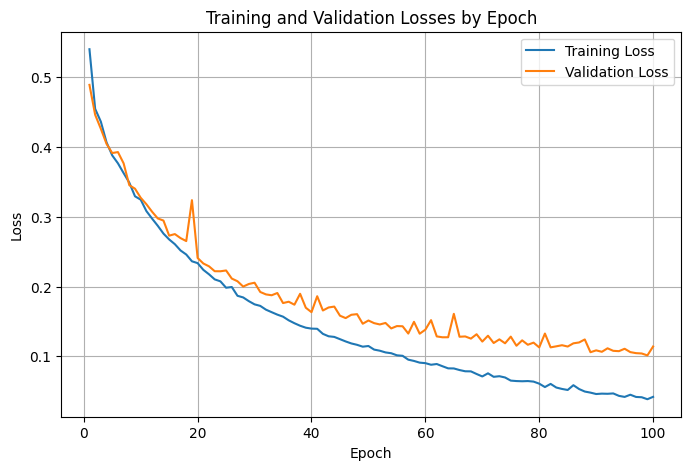

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses by Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
torch.manual_seed(42)

csvfile = "test_data.csv"
cid = CustomImageDataset(csvfile)

data_loader = torch.utils.data.DataLoader(
    cid,
    batch_size=batch_size,
    shuffle=True,
    drop_last=True,
    num_workers=0,
)

correct = 0
total = 0
pred_label = []
true_label = []

with torch.no_grad():
    for vector, label in data_loader:
        label = label.long()
        pred = model(vector.unsqueeze(1))
        _, predicted = torch.max(pred.data, 1)
        Y_hat = torch.argmax(pred, dim=1)
        Y_prob = F.softmax(pred, dim=1)

        total += label.size(0)
        correct += (predicted == label).sum().item()
        true_label.extend(label.tolist())
        pred_label.extend(Y_hat.tolist())

accuracy = 100 * correct / total
print("Accuracy", accuracy)

print(confusion_matrix(true_label, pred_label))

precision, recall, f1, _ = precision_recall_fscore_support(true_label, pred_label, average='binary')
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

Accuracy 94.79166666666667
[[ 775   29]
 [ 121 1955]]
Precision: 0.9854, Recall: 0.9417, F1-Score: 0.9631
